In [2]:
import numpy as np
import scipy
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt
import os
import cv2

C:\Users\011294736\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
image = plt.imread('E:\\downuloadu\\blurry_eye_spy_stereogram.png')
cv2.imshow('Original Image', image)

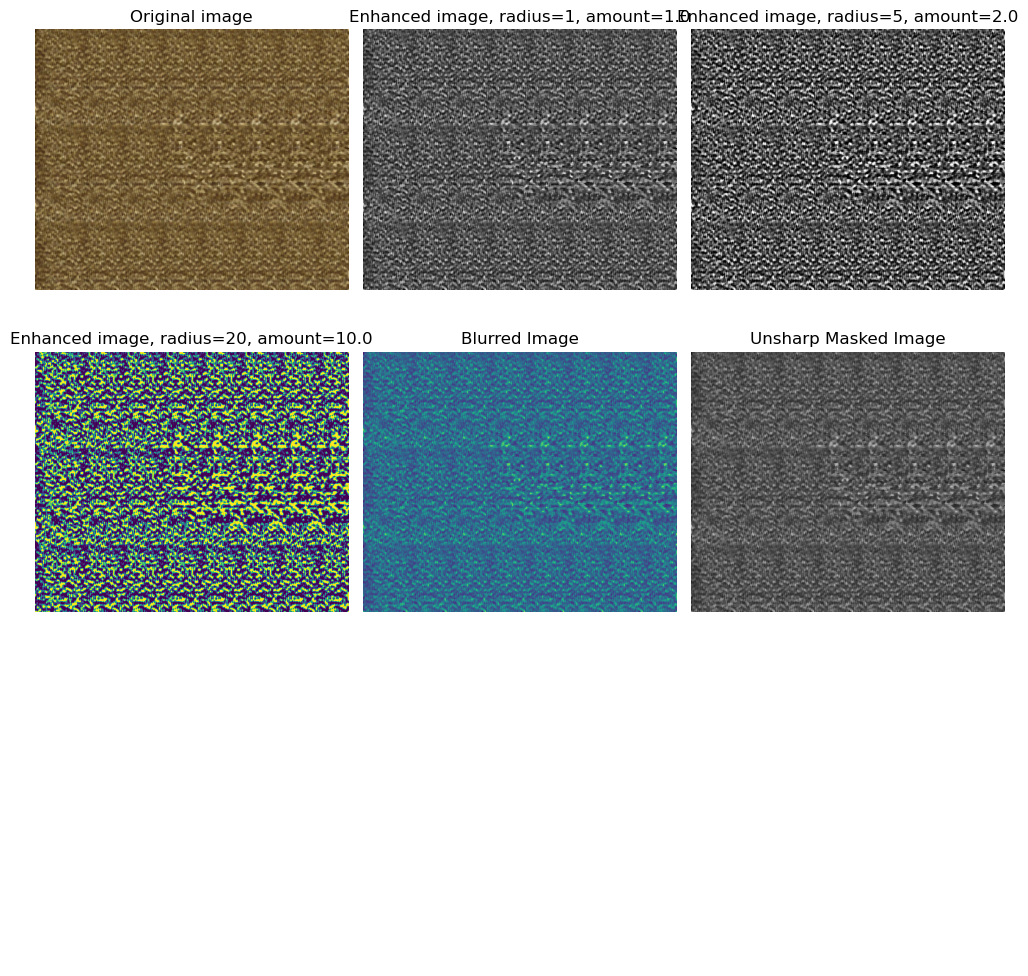

In [4]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

result_1 = unsharp_mask(gray, radius=3, amount=1)
result_2 = unsharp_mask(gray, radius=5, amount=2)
result_3 = unsharp_mask(gray, radius=20, amount=10)

# Apply Gaussian blur to grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Calculate the unsharp mask
unsharp = cv2.addWeighted(gray, 1.5, blurred, -0.5, 0)

# Convert unsharp mask back to color
unsharp_color = cv2.cvtColor(unsharp, cv2.COLOR_GRAY2BGR)

fig, axes = plt.subplots(nrows=3, ncols=3,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3)
ax[3].set_title('Enhanced image, radius=20, amount=10.0')
ax[4].imshow(unsharp)
ax[4].set_title('Blurred Image')
ax[5].imshow(unsharp_color)
ax[5].set_title('Unsharp Masked Image')
for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

In [5]:
# convert to save images for use with magic eye solver/viewer
result1 = cv2.normalize(result_1, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
result2 = cv2.normalize(result_2, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
result3 = cv2.normalize(result_3, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
unsharpd = cv2.normalize(unsharp, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
unsharpd_color = cv2.normalize(unsharpd, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# NOTE: .jpeg??
cv2.imwrite('E:\\downuloadu\\rad3_evil_minion.png',result1)
cv2.imwrite('E:\\downuloadu\\rad5_evil_minion.png',result2)
cv2.imwrite('E:\\downuloadu\\rad50_evil_minion.png',result3)
cv2.imwrite('E:\\downuloadu\\blurmask_evil_minion.png',unsharpd)
cv2.imwrite('E:\\downuloadu\\unsharp_evil_minion.png',unsharpd_color)

True